## Documentation
* https://towardsdatascience.com/introducing-hoeffdings-inequality-for-creating-storage-less-decision-trees-b5135e65e51e

In [1]:
from sklearn import svm
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import export_text


In [2]:
dataset_feature_names=[     'amount_usd',      
                            'client_age',
                           'client_gender__',
                          'client_gender__F',
                          'client_gender__M',
                            'debit_type__TC',
                            'debit_type__TD',
                          'agency_region__0',
                          'agency_region__1',
                          'agency_region__2',
                          'agency_region__3',
                          'agency_region__4',
                          'agency_region__5',
                          'agency_region__6',
                          'agency_region__7',
                          'agency_region__8',
                          'agency_region__9',
                         'agency_region__10',
                         'agency_region__11',
                         'agency_region__12',
                  'merchant_departement__99',
            'merchant_departement__AMAZONAS',
              'merchant_departement__ANCASH',
            'merchant_departement__APURIMAC',
            'merchant_departement__AREQUIPA',
            'merchant_departement__AYACUCHO',
           'merchant_departement__CAJAMARCA',
              'merchant_departement__CALLAO',
               'merchant_departement__CUSCO',
        'merchant_departement__HUANCAVELICA',
             'merchant_departement__HUÁNUCO',
                 'merchant_departement__ICA',
               'merchant_departement__JUNIN',
         'merchant_departement__LA LIBERTAD',
          'merchant_departement__LAMBAYEQUE',
                'merchant_departement__LIMA',
              'merchant_departement__LORETO',
       'merchant_departement__MADRE DE DIOS',
            'merchant_departement__MOQUEGUA',
               'merchant_departement__PASCO',
               'merchant_departement__PIURA',
                'merchant_departement__PUNO',
          'merchant_departement__SAN MARTIN',
               'merchant_departement__TACNA',
              'merchant_departement__TUMBES',
             'merchant_departement__UCAYALI',
                              'social_class']
              

In [3]:
#read dataset
df = pd.read_csv('../data_output/export_dataframe_0v4.csv',header=None,names=dataset_feature_names)
y=np.asarray(df['social_class'])
X=np.asarray(df.iloc[:,0:-1])

In [4]:
X.shape

(1000000, 46)

## Fitting a Hoeffding Tree at once  vs fitting it via Streaming

In [5]:
# from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from skmultiflow.trees.hoeffding_adaptive_tree import HAT
import matplotlib.pyplot as plt


### fitting at once 

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)# Define a tree for fitting the complete dataset and one for streaming.
ht_complete = HAT()
ht_complete.fit(X_train, y_train)
ht_complete_score = ht_complete.score(X_test, y_test)
print(f'Score when fitting at once: {ht_complete_score}')# Streaming samples one after another.


Score when fitting at once: 0.850295


### Streaming 

Score when streaming after 0 samples: 0.8504
(Almost) full score reached! Continue for another 0 samples.
Score when streaming after 1 samples: 0.850395
(Almost) full score reached! Continue for another 1 samples.
Score when streaming after 2 samples: 0.850395
(Almost) full score reached! Continue for another 2 samples.
Score when streaming after 3 samples: 0.850395
(Almost) full score reached! Continue for another 3 samples.
Score when streaming after 4 samples: 0.8504
(Almost) full score reached! Continue for another 4 samples.
Score when streaming after 5 samples: 0.8504
(Almost) full score reached! Continue for another 5 samples.
Score when streaming after 6 samples: 0.8504
(Almost) full score reached! Continue for another 6 samples.
Score when streaming after 7 samples: 0.73501
Score when streaming after 8 samples: 0.8504
(Almost) full score reached! Continue for another 7 samples.
Score when streaming after 9 samples: 0.8504
(Almost) full score reached! Continue for another 8 sam

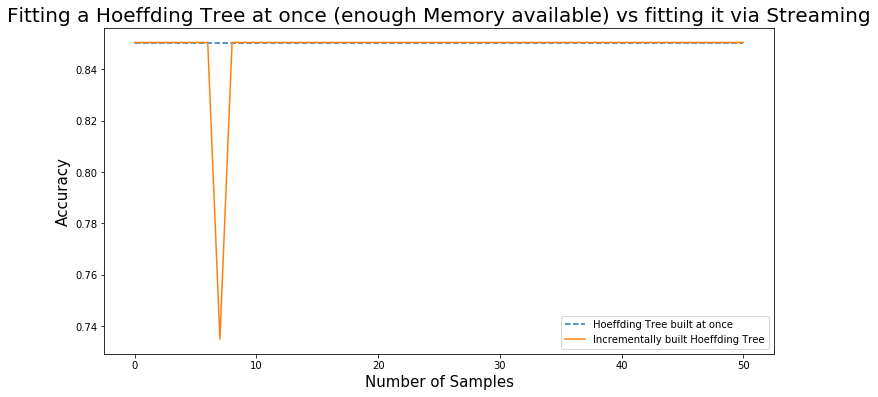

In [11]:
ht_partial = HAT()# Fit the complete dataset.
res = []# Create a dataset.
timer = False
j = 0
for i in range(len(X_train)):
    ht_partial.partial_fit(X_train[i].reshape(1, -1), np.array([y_train[i]]))
    res.append(ht_partial.score(X_test, y_test))
    print(f'Score when streaming after {i} samples: {res[-1]}')
    if res[-1] >= ht_complete_score - 0.01:
        print(f'(Almost) full score reached! Continue for another {j} samples.')
        j += 1
    if j >= 50:
        break# Plot the scores after each sample.
plt.figure(figsize=(12, 6))
plt.plot([0, i], [ht_complete_score, ht_complete_score], '--', label='Hoeffding Tree built at once')
plt.plot(res, label='Incrementally built Hoeffding Tree')
plt.xlabel('Number of Samples', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Fitting a Hoeffding Tree at once (enough Memory available) vs fitting it via Streaming', fontsize=20)
plt.legend()